# Exercise 3 - Solution
***

<div class=obj>
    <b>Aim:</b> To readin and visualise the data from a large data file.
</div>

<p></p>



## S3.1 Mass-Radius diagram
***

In [81]:
# Imports

#to readin data:
import pandas as pd
#to plot:
import matplotlib.pyplot as plt

#Readin
df = pd.read_csv('data/exoplanet.eu_catalog.csv')

#let's look at what we have just imporated in, we can use .keys() and .head() to do this
df.keys()
#df.head()

#and shape again tells us how much data we have
#df.shape

Index(['# name', 'planet_status', 'mass', 'mass_error_min', 'mass_error_max',
       'mass_sini', 'mass_sini_error_min', 'mass_sini_error_max', 'radius',
       'radius_error_min', 'radius_error_max', 'orbital_period',
       'orbital_period_error_min', 'orbital_period_error_max',
       'semi_major_axis', 'semi_major_axis_error_min',
       'semi_major_axis_error_max', 'eccentricity', 'eccentricity_error_min',
       'eccentricity_error_max', 'inclination', 'inclination_error_min',
       'inclination_error_max', 'angular_distance', 'discovered', 'updated',
       'omega', 'omega_error_min', 'omega_error_max', 'tperi',
       'tperi_error_min', 'tperi_error_max', 'tconj', 'tconj_error_min',
       'tconj_error_max', 'tzero_tr', 'tzero_tr_error_min',
       'tzero_tr_error_max', 'tzero_tr_sec', 'tzero_tr_sec_error_min',
       'tzero_tr_sec_error_max', 'lambda_angle', 'lambda_angle_error_min',
       'lambda_angle_error_max', 'impact_parameter',
       'impact_parameter_error_min', 'im

In [31]:
#Let's filter the data
#we are looking for planets that are confirmed, and have known masses and radii
df_clean = df[(df.planet_status == 'Confirmed') & (df.mass.notna()) & (df.radius.notna())]

print('We started with', df.shape[0], 'data')
print('We now have', df_clean.shape[0], 'data')

We started with 4108 data
We now have 806 data


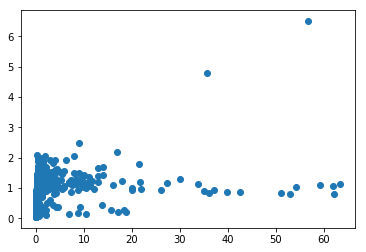

In [32]:
#now, let's plot using the subplots command
fg, ax = plt.subplots(1)

ax.scatter(df_clean.mass, df_clean.radius);

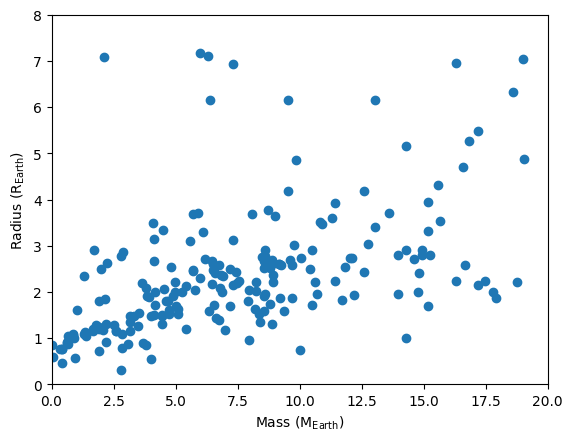

In [66]:
#This does not look very good, so let's see what we can do
fg, ax = plt.subplots(1)

#Let's apply a conversion to get numbers in terms of Earth mass and radius
mconv = 317.8
rconv = 11.2

ax.scatter(df_clean.mass * mconv, df_clean.radius * rconv)

#let's reset the y limits to something sensible, it looks like there are a couple of fliers
ax.set_ylim(0,8);
#I also don't want negative mass
ax.set_xlim(0, 20)

ax.set_xlabel(r'Mass (M$_\mathsf{Earth}$)');
ax.set_ylabel(r'Radius (R$_\mathsf{Earth}$)');

## Going further

There is a _lot_ of plot optimisation that is possible with Matplotlib...

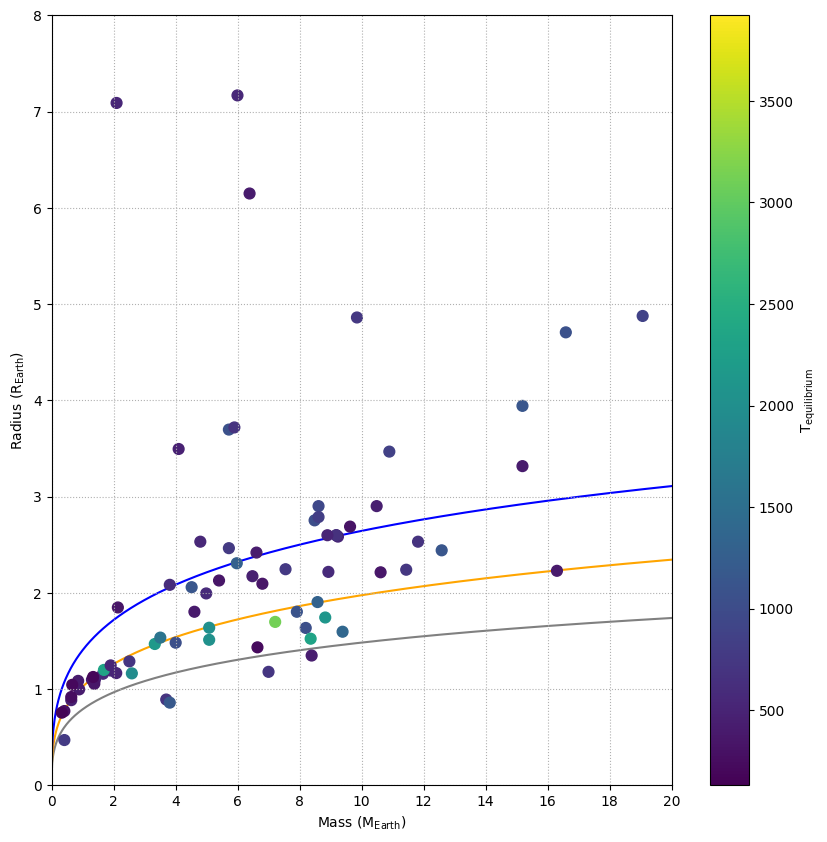

In [80]:
#now we are going to need numpy
import numpy as np

#we need to import these extra elements of matplotlib if we want to gain further
# customisation over the plots
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fg, ax = plt.subplots(1)

#let's make the plot larger so we can see what is going on
fg.set_size_inches(10,10)

mconv = 317.8
rconv = 11.2

#we are going to need larger symbols now that the plot is bigger
im = ax.scatter(df_clean.mass * mconv, df_clean.radius * rconv, c=df_clean.temp_calculated, s=60)

#we should add a color bar
fg.colorbar(im, label=r'T$_\mathsf{equilibrium}$')

#The default numbering along x is not sensible, creating half mass intervals.  Let's force an
# integer number at each of the tick locations (with an interval of 2)
ax.xaxis.set_major_locator(MultipleLocator(2))

#let's add a grid
ax.grid(ls=':')

ax.set_ylim(0,8);
ax.set_xlim(0, 20)

ax.set_xlabel(r'Mass (M$_\mathsf{Earth}$)');
ax.set_ylabel(r'Radius (R$_\mathsf{Earth}$)');

#Now let's put on the reference equations of state
# defining a function to perform the calculation, which we will assume takes mass and provides radius as output
def mrEos(nm, m):
    if nm == 'fe':
        m1 = 5.8
        r1 = 2.52
        k1 = -0.209490
        k2 = 0.0804
        k3 = 0.394
    elif nm == 'mg':
        m1 = 10.55
        r1 = 3.90
        k1 = -0.209594
        k2 = 0.0799
        k3 = 0.413
    elif nm == 'water':
        m1 = 5.52
        r1 = 4.43
        k1 = -0.209396
        k2 = 0.0807
        k3 = 0.375
        
    return 10**(k1 + 1/3 * np.log10(m/m1) - k2*(m/m1)**k3) * r1

#create array of independent variable (mass)
# defining the limit based on the current limit of the x axis
masses = np.linspace(1e-3, ax.get_xlim()[1], 1000)

#create list of material names and loop over it
materials = ['fe', 'mg', 'water']
mat_colors = ['grey', 'orange', 'blue']
# we can loop over both of these lists at once using a for loop and 'zip' to temporarily put them together
for m, c in zip(materials, mat_colors):
    #zorder sets the relative plotting order of the elements 
    # setting -2 ensure the lines fall below the data
    ax.plot(masses, mrEos(m, masses), zorder=-1, c=c)

This plot nicely shows us that a number of objects discovered have the average density of a pure water planet of equal mass, and in some cases are much less dense.  These must be gas giants like Jupiter and Saturn.

## S3.2 Period-Radius diagram
***

We started with 4108 data
We now have 3013 data


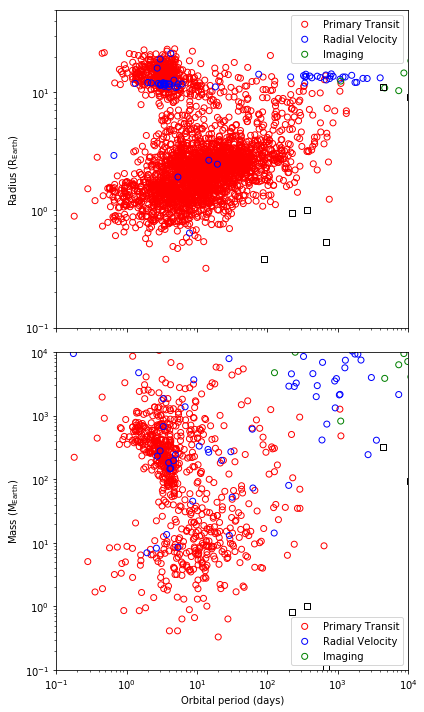

In [51]:
#let's start from scratch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

mconv = 317.8
rconv = 11.2

df = pd.read_csv('data/exoplanet.eu_catalog.csv')
df_clean = df[(df.radius.notna()) & (df.orbital_period.notna())]

print('We started with', df.shape[0], 'data')
print('We now have', df_clean.shape[0], 'data')
#notice, many many more planets have radii and periods constrained than have masses constrained

#as we are creating two plots with a common x axis (orbital period), we can set 'sharex=True'
fg, ax = plt.subplots(2, sharex=True)
fg.set_size_inches(6,10)

#now, we want to color the symbols by detection method
dets = ['Primary Transit', 'Radial Velocity', 'Imaging']
det_cols = ['red', 'blue', 'green']
p = [0]*4 #object to store properties of plotted data points

#enumerate allows us to move through a list, whilst also keeping count of where we are
# we will use the counter, i, to access 'p', which will store the properties of the points we 
# plot, so that we can construct a legend later, we store the current values of dets and det_cols
# in the object pckd and the 'unpack' these into 'd' and 'c' in the body of the for loop
for i, pckd in enumerate(zip(dets, det_cols)):
    d, c = pckd
    p[i] = ax[0].scatter(df_clean.orbital_period[df_clean.detection_type==d], 
                   df_clean.radius[df_clean.detection_type==d]*rconv, edgecolor=c, c='None');

    
#let's only look out to 100 days
ax[0].set_xlim(0.1,10000);
ax[0].set_ylim(0.1,50)

#make the x and y axes logarithmic
ax[0].set_yscale('log')
ax[0].set_xscale('log')

# we don't need to set x for the top plot, as we have set them to share their x-axis
#ax[0].set_xlabel('Orbital period (days)')
ax[0].set_ylabel(r'Radius (R$_\mathsf{Earth}$)');

#create a dictionary to store solar system planet locations
sols = {'Mercury': [2440, 88, 3.285],
'Venus': [6051, 225, 48.67],
'Earth': [6371, 365, 59.72],
'Mars': [3390, 687, 6.39],
'Jupiter': [69911, 4329, 18980],
'Saturn': [58232, 10752, 5683],
'Uranus': [25362, 30660, 868.1],
'Neptune': [24622, 60225, 1024]}

#loop through dictionary plotting solar system planets on
for k in sols:
    p[3] = ax[0].scatter(sols[k][1], sols[k][0]/sols['Earth'][0], marker='s', c='None', edgecolor='black')

# let's also add a legend
ax[0].legend(p, dets);


#now for mass-period
# we should refilter the dataset for the properties we are interested in
df_clean = df[(df.mass.notna()) & (df.orbital_period.notna())]

for i, pckd in enumerate(zip(dets, det_cols)):
    d, c = pckd
    p[i] = ax[1].scatter(df_clean.orbital_period[df_clean.detection_type==d], 
                   df_clean.mass[df_clean.detection_type==d]*mconv, edgecolor=c, c='None');

    
#let's only look out to 100 days
ax[1].set_xlim(0.1,10000);
ax[1].set_ylim(0.1,10000)

#make the d and y axes logarithmic
ax[1].set_yscale('log')
ax[1].set_xscale('log')

# we don't need to set x for the top plot, as we have set them to share their x-axis
ax[1].set_xlabel('Orbital period (days)')
ax[1].set_ylabel(r'Mass (M$_\mathsf{Earth}$)');

#loop through dictionary plotting solar system planets on
for k in sols:
    p[3] = ax[1].scatter(sols[k][1], sols[k][2]/sols['Earth'][2], marker='s', c='None', edgecolor='black')

# let's also add a legend
ax[1].legend(p, dets);



fg.tight_layout()

There are clearly significant biases in the exoplanet record, either that or our solar system is extremely odd...

In [52]:
from IPython.core.display import HTML
def css_styling():
    styles = open(".styles/custom.css", "r").read()
    return HTML(styles)
css_styling()